<a href="https://colab.research.google.com/github/Ankit2759/ImageProcessing/blob/main/filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

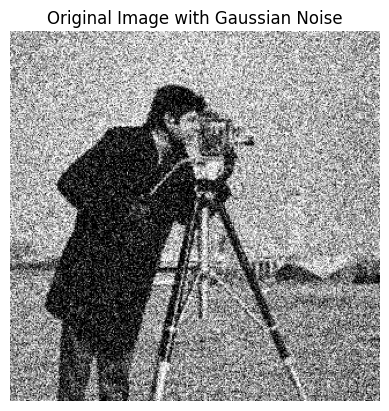

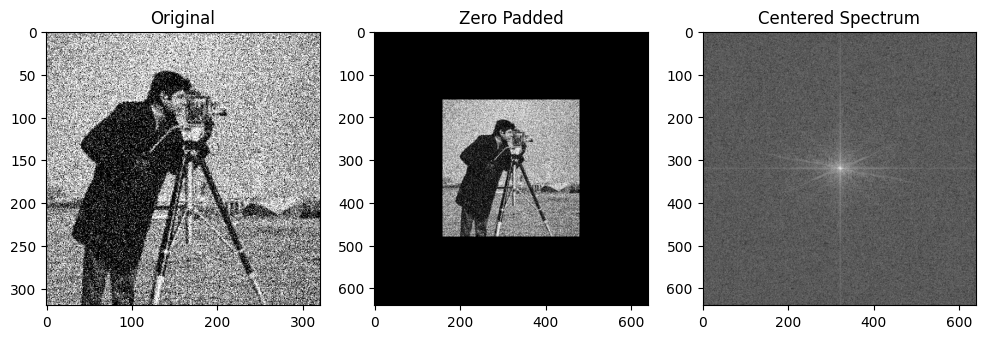

Enter cutoff for Ideal LPF: 40
Enter cutoff for Ideal HPF: 40


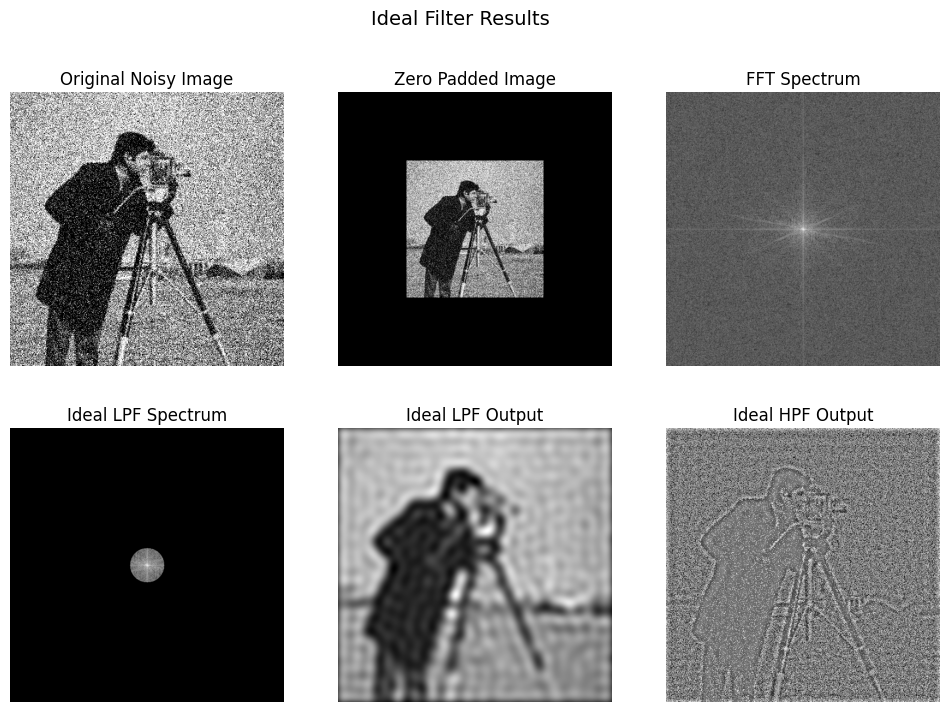

Enter cutoff for Butterworth LPF: 40
Enter cutoff for Butterworth HPF: 40
Enter order of Butterworth filter: 2


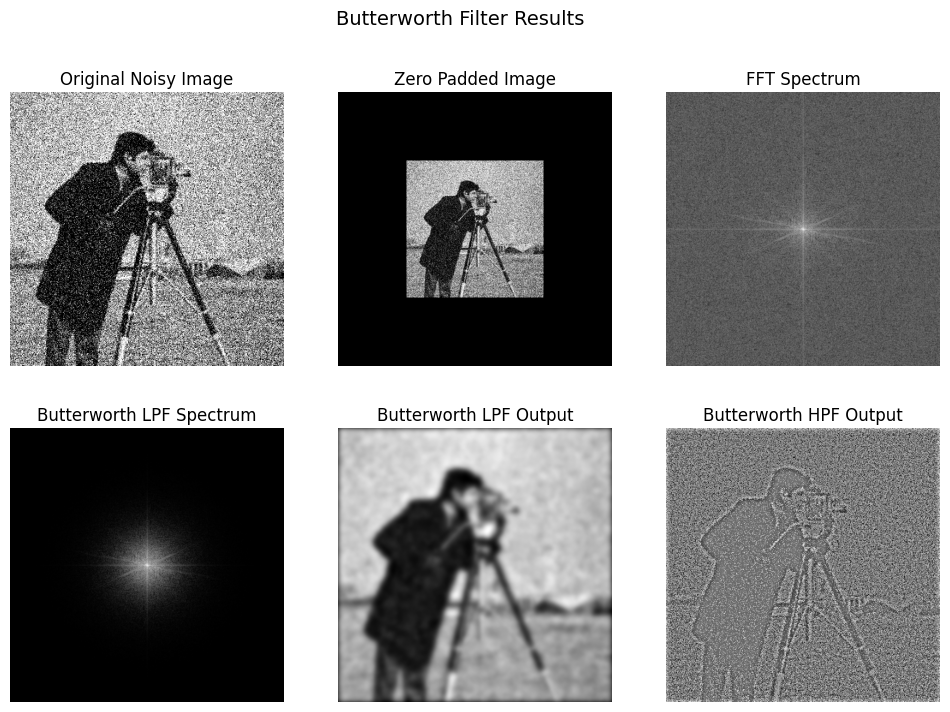

Enter cutoff for Gaussian LPF: 40
Enter cutoff for Gaussian HPF: 40


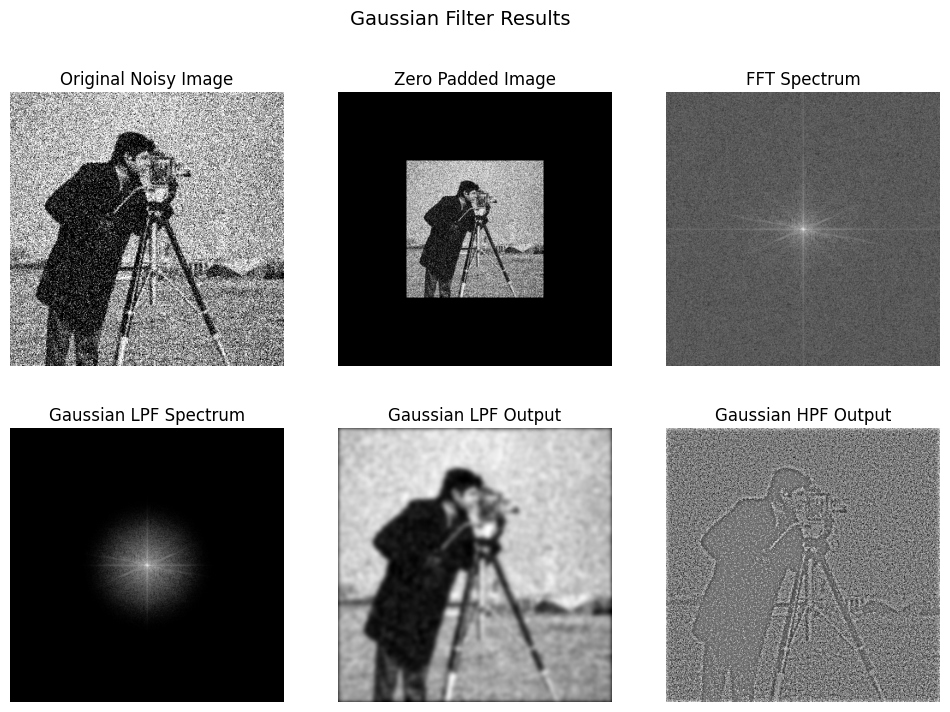

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#  Read image and add Gaussian noise

img = cv2.imread('/content/cameraman.jpg', cv2.IMREAD_GRAYSCALE)
img = img.astype(np.float32) / 255.0  # normalize to [0,1]

# Add Gaussian noise (mean=0, variance=0.05)
mean = 0
var = 0.05
noise = np.random.normal(mean, np.sqrt(var), img.shape)
noisy_img = np.clip(img + noise, 0, 1)

plt.figure()
plt.imshow(noisy_img, cmap='gray')
plt.title('Original Image with Gaussian Noise')
plt.axis('off')


# Zero Padding and Fourier Transform

m, n = noisy_img.shape
padded = np.pad(noisy_img, ((m//2, m//2), (n//2, n//2)), mode='constant')
F = np.fft.fft2(padded)
Fshift = np.fft.fftshift(F)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(noisy_img, cmap='gray'), plt.title('Original')
plt.subplot(1,3,2), plt.imshow(padded, cmap='gray'), plt.title('Zero Padded')
plt.subplot(1,3,3), plt.imshow(np.log(1 + np.abs(Fshift)), cmap='gray'), plt.title('Centered Spectrum')
plt.show()

# Create Distance Matrix

rows, cols = Fshift.shape
u = np.arange(cols)
v = np.arange(rows)
u, v = np.meshgrid(u, v)
D = np.sqrt((u - cols/2)**2 + (v - rows/2)**2)

# Helper Function to Apply Filter and Display Results

def apply_filter(H_LPF, H_HPF, filter_name):
    # Low Pass Filtering
    F_LPF = Fshift * H_LPF
    f_LPF = np.fft.ifft2(np.fft.ifftshift(F_LPF))
    result_LPF = np.real(f_LPF)[m//2:m//2+m, n//2:n//2+n]

    # High Pass Filtering
    F_HPF = Fshift * H_HPF
    f_HPF = np.fft.ifft2(np.fft.ifftshift(F_HPF))
    result_HPF = np.real(f_HPF)[m//2:m//2+m, n//2:n//2+n]

    # Visualization
    plt.figure(figsize=(12,8))
    plt.suptitle(f'{filter_name} Filter Results', fontsize=14)

    plt.subplot(2,3,1), plt.imshow(noisy_img, cmap='gray'), plt.title('Original Noisy Image'), plt.axis('off')
    plt.subplot(2,3,2), plt.imshow(padded, cmap='gray'), plt.title('Zero Padded Image'), plt.axis('off')
    plt.subplot(2,3,3), plt.imshow(np.log(1+np.abs(Fshift)), cmap='gray'), plt.title('FFT Spectrum'), plt.axis('off')
    plt.subplot(2,3,4), plt.imshow(np.log(1+np.abs(F_LPF)), cmap='gray'), plt.title(f'{filter_name} LPF Spectrum'), plt.axis('off')
    plt.subplot(2,3,5), plt.imshow(result_LPF, cmap='gray'), plt.title(f'{filter_name} LPF Output'), plt.axis('off')
    plt.subplot(2,3,6), plt.imshow(result_HPF, cmap='gray'), plt.title(f'{filter_name} HPF Output'), plt.axis('off')
    plt.show()

#  Ideal Low Pass & High Pass

r_LPF = int(input("Enter cutoff for Ideal LPF: "))
r_HPF = int(input("Enter cutoff for Ideal HPF: "))

H_ideal_LPF = (D <= r_LPF).astype(float)
H_ideal_HPF = 1 - (D <= r_HPF).astype(float)

apply_filter(H_ideal_LPF, H_ideal_HPF, "Ideal")

#  Butterworth Low Pass & High Pass
D0_LPF = int(input("Enter cutoff for Butterworth LPF: "))
D0_HPF = int(input("Enter cutoff for Butterworth HPF: "))
n_butter = int(input("Enter order of Butterworth filter: "))

H_butter_LPF = 1 / (1 + (D / D0_LPF)**(2*n_butter))
H_butter_HPF = 1 - (1 / (1 + (D / D0_HPF)**(2*n_butter)))

apply_filter(H_butter_LPF, H_butter_HPF, "Butterworth")

#  Gaussian Low Pass & High Pass
D0_GLP = int(input("Enter cutoff for Gaussian LPF: "))
D0_GHP = int(input("Enter cutoff for Gaussian HPF: "))

H_gauss_LPF = np.exp(-(D**2) / (2 * D0_GLP**2))
H_gauss_HPF = 1 - np.exp(-(D**2) / (2 * D0_GHP**2))

apply_filter(H_gauss_LPF, H_gauss_HPF, "Gaussian")
